In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-classification-dataset/gender_classification_v7.csv


In [2]:
data=pd.read_csv('/kaggle/input/gender-classification-dataset/gender_classification_v7.csv')
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
data.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [5]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [6]:
data.shape

(5001, 8)

In [7]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.isnull().sum()/len(data)

long_hair                    0.0
forehead_width_cm            0.0
forehead_height_cm           0.0
nose_wide                    0.0
nose_long                    0.0
lips_thin                    0.0
distance_nose_to_lip_long    0.0
gender                       0.0
dtype: float64

# Data Cleaning Not required, NO null values

# DATA MAPPING

In [9]:
numericGender={'Male':1, 'Female':0}
data['gender']=data['gender'].map(numericGender)

In [10]:
data['gender']

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

# Data Visualization


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

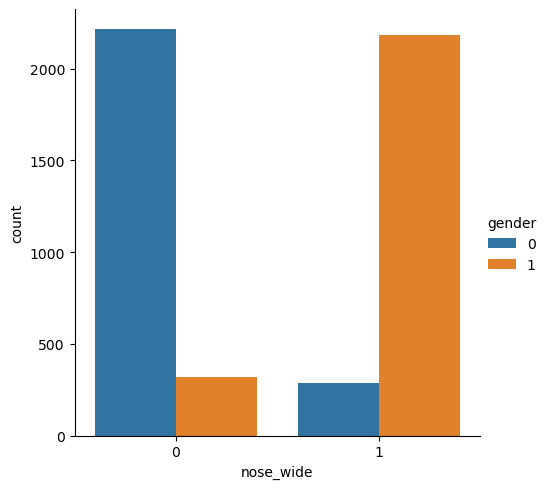

In [12]:
sns.catplot(x="nose_wide", hue="gender", kind="count", data=data)

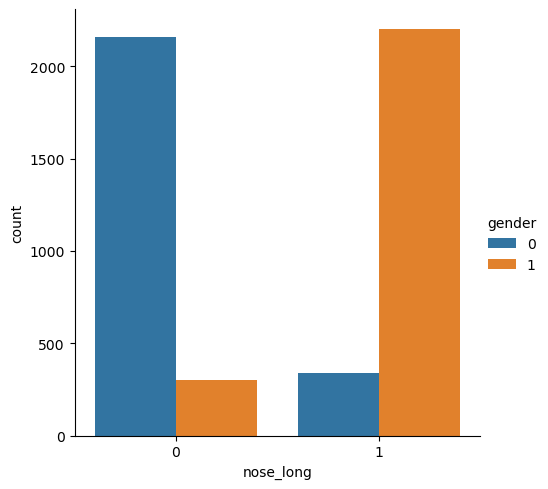

In [13]:
sns.catplot(x="nose_long", hue="gender", kind="count", data=data)

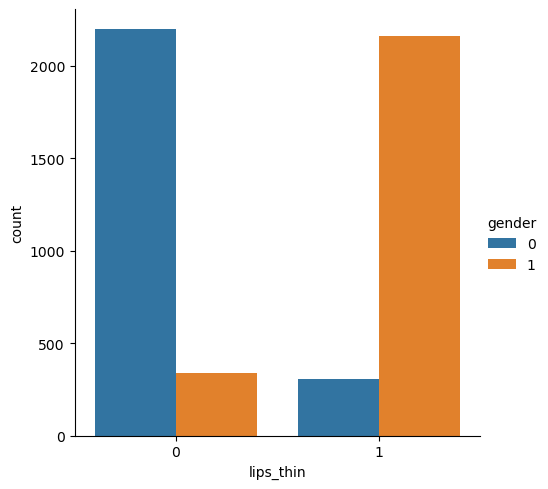

In [14]:
sns.catplot(x="lips_thin", hue="gender", kind="count", data=data)

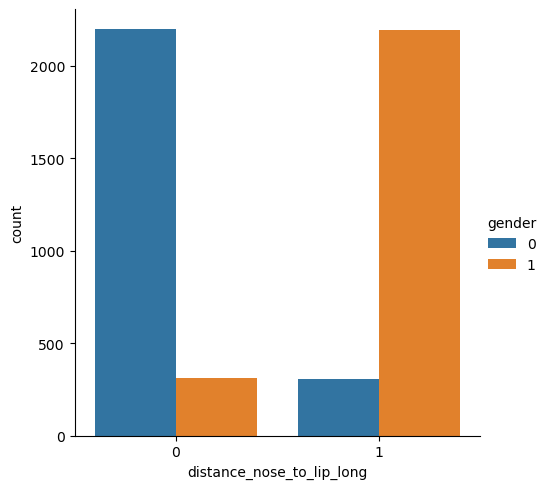

In [15]:
sns.catplot(x='distance_nose_to_lip_long',hue='gender',data=data,kind='count')

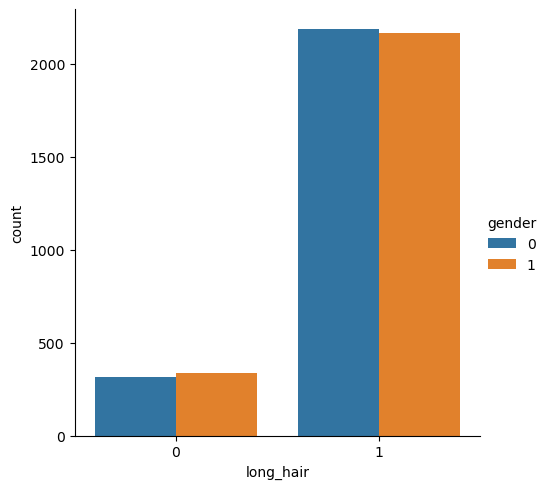

In [16]:
sns.catplot(data=data,x='long_hair',hue='gender',kind='count')

In [17]:
correl=data.corr()
correl

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794,-0.010767
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328,0.334125
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292,0.277190
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303,0.758502
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794,0.744147
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312,0.743319
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000,0.754850
gender,-0.010767,0.334125,0.277190,0.758502,0.744147,0.743319,0.754850,1.000000


In [18]:
print(correl['gender'])

long_hair                   -0.010767
forehead_width_cm            0.334125
forehead_height_cm           0.277190
nose_wide                    0.758502
nose_long                    0.744147
lips_thin                    0.743319
distance_nose_to_lip_long    0.754850
gender                       1.000000
Name: gender, dtype: float64


<Axes: >

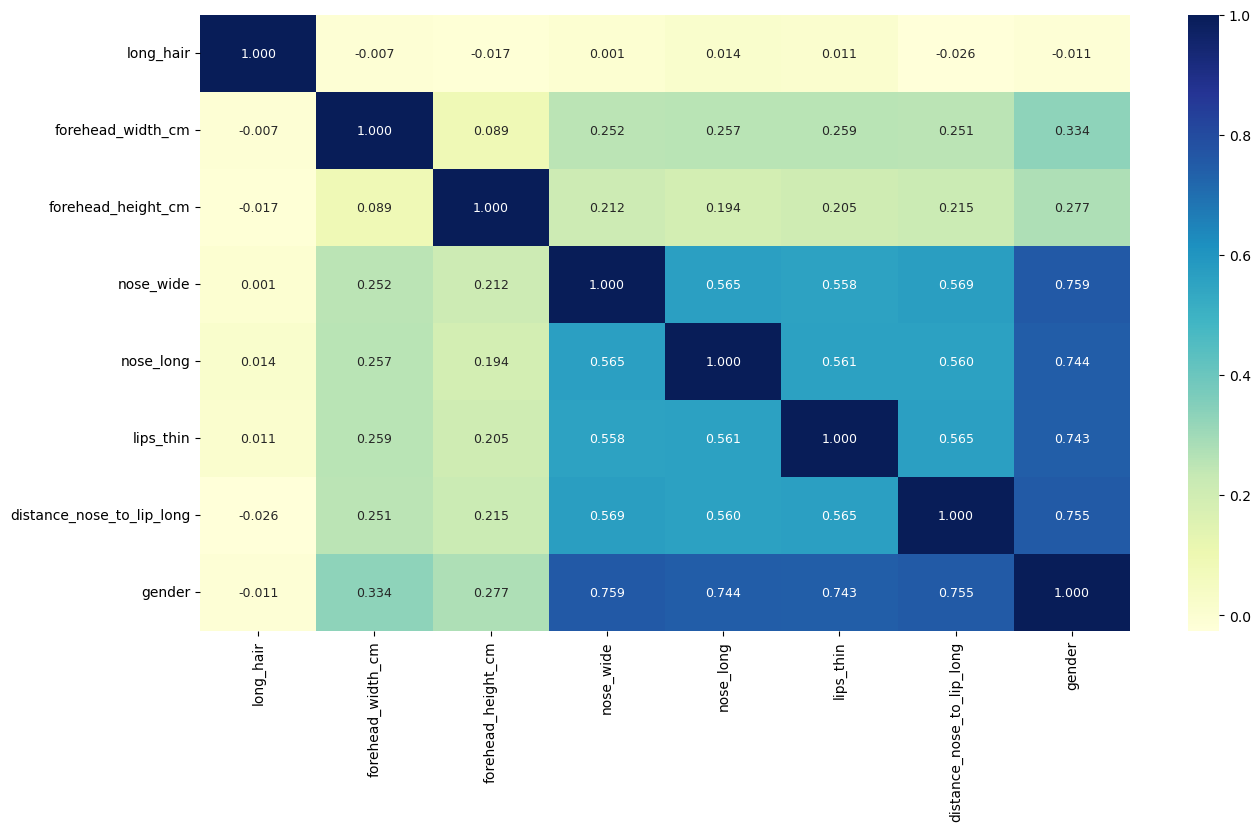

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(correl,cbar=True, fmt='.3f',annot=True, annot_kws={'size':9}, cmap="YlGnBu")

# Splitting data

In [20]:
y=data['gender']
y

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

In [21]:
x=data.drop('gender',axis='columns')
x

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2)

# Training using Logistic Refression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf=LogisticRegression().fit(x_train,y_train)

In [26]:
y_pred=clf.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracylog=accuracy_score(y_pred,y_test)
accuracylog

0.9630369630369631

# Desicion Tree

In [29]:
from sklearn import tree

In [30]:
ctree=tree.DecisionTreeClassifier(criterion='gini',splitter='best').fit(x_train,y_train)

In [31]:
y_treepred=ctree.predict(x_test) 

In [32]:
accuracyTree=accuracy_score(y_treepred,y_test)
accuracyTree

0.9530469530469531

# HyperParameter Tunning using GridSearchCV

In [33]:
param=[{'criterion': ['gini', 'entropy'],'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
gridtree=GridSearchCV(ctree,param_grid=param, cv=10,scoring='accuracy')

In [36]:
gridtree.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _val

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [37]:
gridtree.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 2}

In [38]:
gridtreeacc=gridtree.best_score_
print(gridtree.best_score_)

0.9652500000000002


# Random Forest Application

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc=RandomForestClassifier().fit(x_train,y_train)

In [41]:
yrfc=rfc.predict(x_test)
yrfc

array([1, 1, 1, ..., 1, 0, 1])

In [42]:
rfcacc=accuracy_score(yrfc,y_test)
rfcacc

0.97002997002997

# Hyper Parameter Tunning for RFC using GridSearchCV

In [43]:
forst_params={'n_estimators': [50, 100],'max_depth': [5, 10],'min_samples_split': [2, 5],
                'max_features': [3, 5],'criterion': ['gini', 'entropy']}

In [44]:
from sklearn.model_selection import GridSearchCV
gridrfc=GridSearchCV(rfc,forst_params,cv=10,scoring='accuracy')

In [45]:
gridfit=gridrfc.fit(x_train,y_train)

In [46]:
gridrfcacc=gridrfc.best_score_

In [47]:
gridrfc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 3,
 'min_samples_split': 2,
 'n_estimators': 50}

In [48]:
gridrfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=3,
                       n_estimators=50)

# Training using KNN 

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn=KNeighborsClassifier(n_neighbors=10).fit(x_train,y_train)

In [51]:
predictknn=knn.predict(x_test)

In [52]:
knnaccuracy=accuracy_score(predictknn,y_test)
knnaccuracy

0.97002997002997

# Hyper Parameters Using GridSearchCV For KNN

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
parameters={
    'n_neighbors':[3,15],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree', 'brute'],
    'leaf_size':[30,45],
    'p':[1,2],
}

In [55]:
gridknn=GridSearchCV(knn,parameters,cv=10,scoring='accuracy')

In [56]:
gridknn.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 45], 'n_neighbors': [3, 15],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [57]:
gridknn.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=15, p=1)

In [58]:
gridknn.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'n_neighbors': 15,
 'p': 1,
 'weights': 'uniform'}

In [59]:
gridknnacc=gridknn.best_score_

# Accuracy For Different Models/Algorithms

In [60]:
names=['logisitic Regression','Desicion Tree','Random Forest',"KNN"]

In [61]:
accracies=[accuracylog*100,accuracyTree*100,rfcacc*100,knnaccuracy*100]

Text(0.5, 1.0, 'Accuracies of different algos')

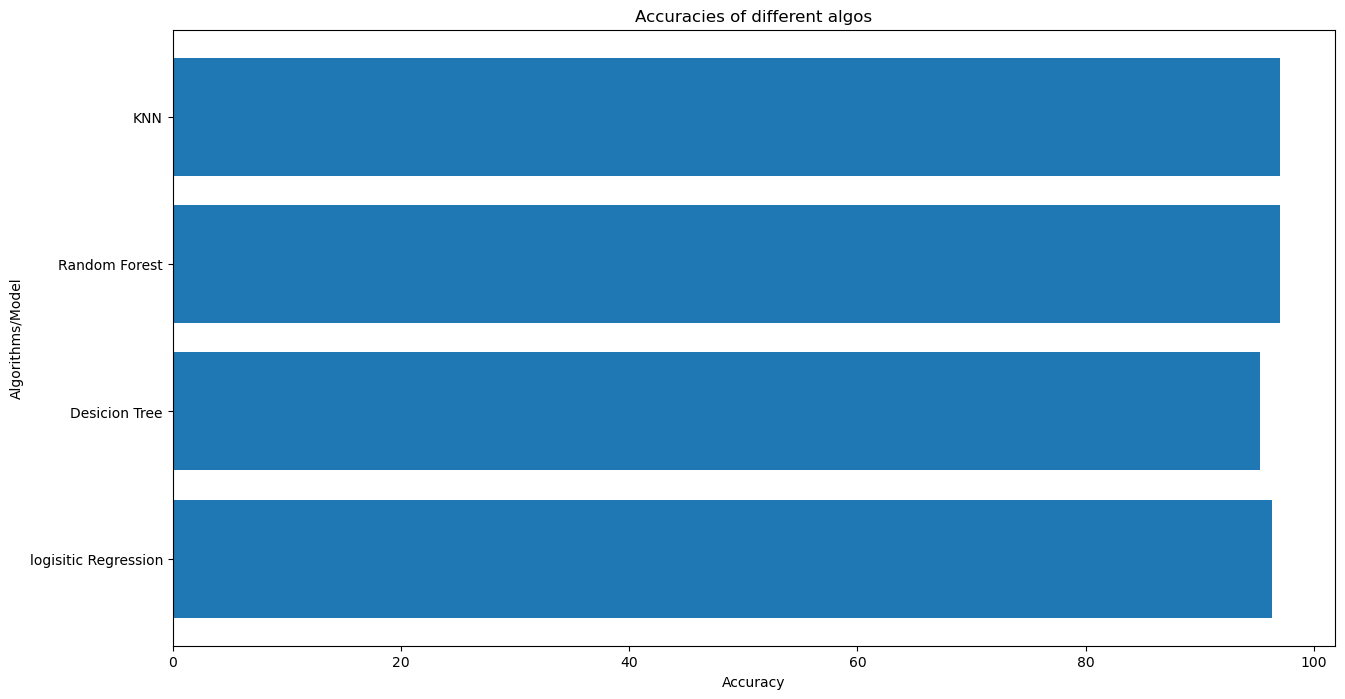

In [62]:
plt.figure(figsize=(15,8))
plt.barh(names,accracies)
plt.ylabel('Algorithms/Model')
plt.xlabel('Accuracy')
plt.title('Accuracies of different algos')

# After Tunning Accuracies

In [63]:
gridacc=[gridtreeacc,gridrfcacc,gridknnacc]
tunnedname=['Desicion Tree','Random Forest','KNN']

Text(0.5, 1.0, 'Accuaries after tunning parameters')

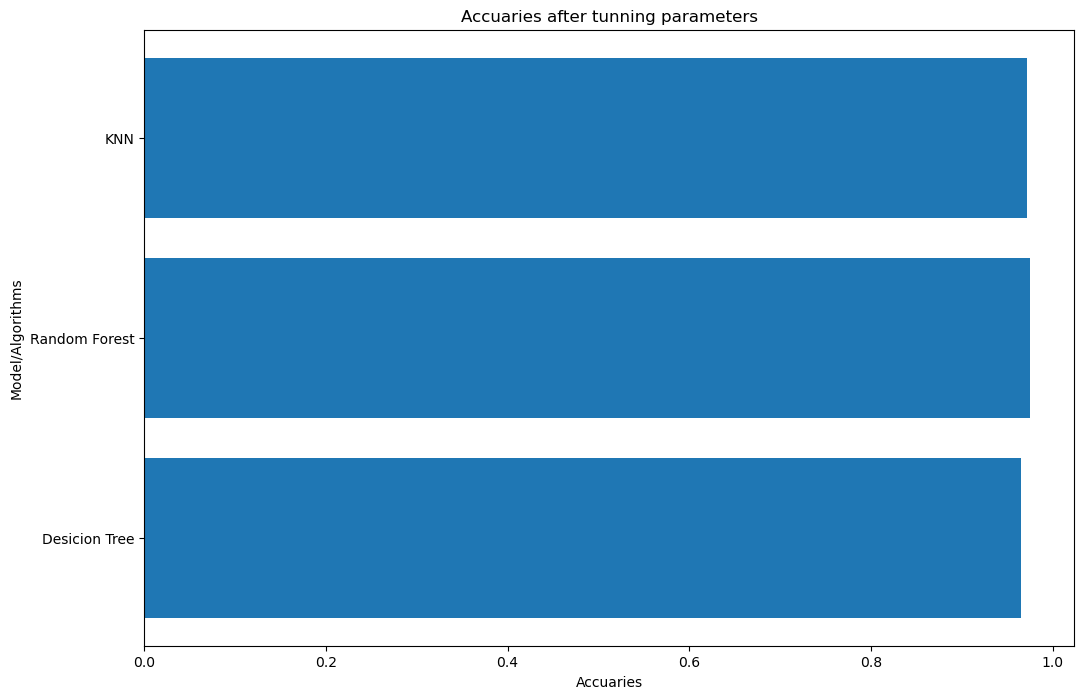

In [64]:
plt.figure(figsize=(12,8))
plt.barh(tunnedname,gridacc)
plt.ylabel('Model/Algorithms')
plt.xlabel('Accuaries')
plt.title('Accuaries after tunning parameters')